Importing Data

In [1]:
import os
import tarfile
from six.moves import urllib
import seaborn as sbn

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
#Loading and preprocessing the data
housing_df = load_housing_data()
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].astype('category')
housing_df['total_rooms'] = housing_df['total_rooms'].astype('int')
#housing_df['total_bedrooms'] = housing_df['total_bedrooms'].astype('int')
housing_df['households'] = housing_df['households'].astype('int')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627,280.0,565.0,259,3.8462,342200.0,NEAR BAY


In [4]:
#General Data
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#NA Values
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

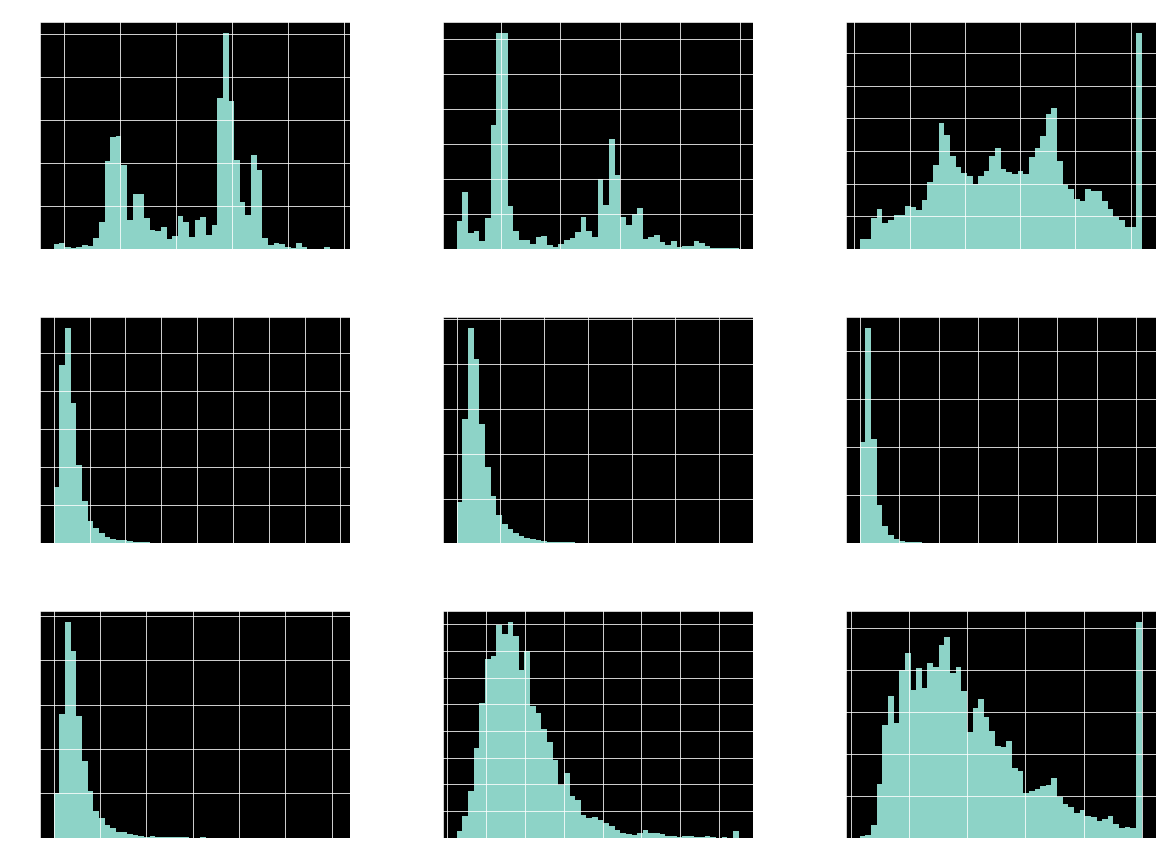

In [6]:
#General hist
fig, *axes = housing_df.hist(bins = 50, figsize = (20,15))
plt.show()

<AxesSubplot:>

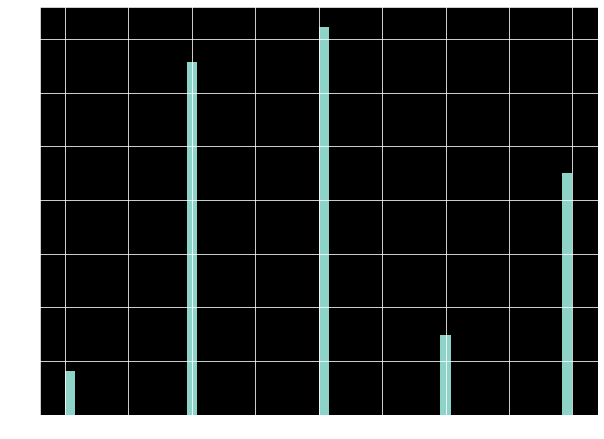

In [7]:
#Creating a category for income

income_classes = [np.ceil(x/1.5) if x <5 else 5.0 for x in housing_df['median_income']]
housing_df['income_cat'] = income_classes
housing_df['income_cat'].hist(bins = 50, figsize = (10, 7.5))


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
split_indices = splitter.split(housing_df, housing_df['income_cat'])


for train, test in split_indices:
    strat_train_set = housing_df.loc[train]
    strat_test_set = housing_df.loc[test]

In [9]:
#Stratification Check
checker = pd.DataFrame()
checker['total'] = (housing_df['income_cat'].value_counts() / len(housing_df))*100
checker['train'] = (strat_train_set['income_cat'].value_counts() / len(strat_train_set))*100
checker['test'] = (strat_test_set['income_cat'].value_counts() / len(strat_test_set))*100
checker

,total,train,test
3.0,35.058140,35.059351,35.053295
2.0,31.884690,31.885901,31.879845
5.0,21.845930,21.844719,21.850775
4.0,7.228682,7.225048,7.243217
1.0,3.982558,3.984981,3.972868


In [10]:
#Removing the stratifier parameter from the sets
for dsets in (strat_train_set, strat_test_set):
    dsets.drop('income_cat', axis = 'columns',  inplace = True)

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17172,-122.26,37.38,28.0,1103,164.0,415.0,154,7.8633,500001.0,NEAR OCEAN
5293,-118.43,34.07,38.0,3251,656.0,1251.0,593,7.7382,500001.0,<1H OCEAN
14663,-117.12,32.80,29.0,2863,534.0,1392.0,522,3.8719,174200.0,NEAR OCEAN
13986,-117.06,34.87,14.0,3348,619.0,1756.0,557,3.5987,91400.0,INLAND
16896,-122.36,37.58,37.0,3325,734.0,1468.0,692,4.0987,434000.0,NEAR OCEAN


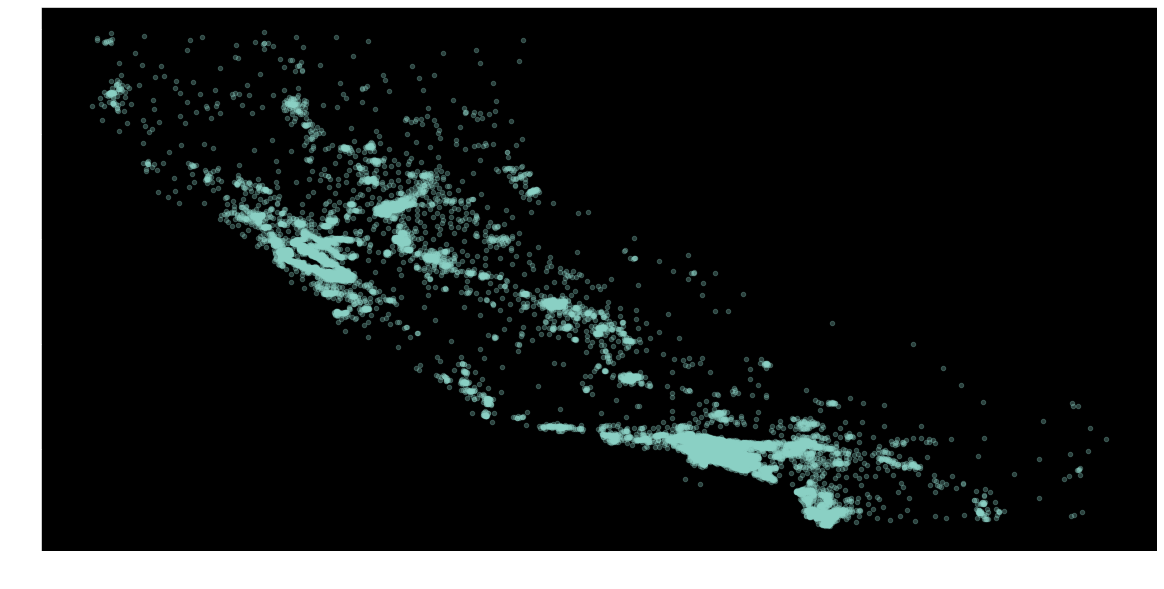

In [11]:
housing = strat_train_set.copy()
housing.plot(kind = 'scatter', x='longitude', y = 'latitude', figsize = (20,10), alpha = 0.3)
plt.show()

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

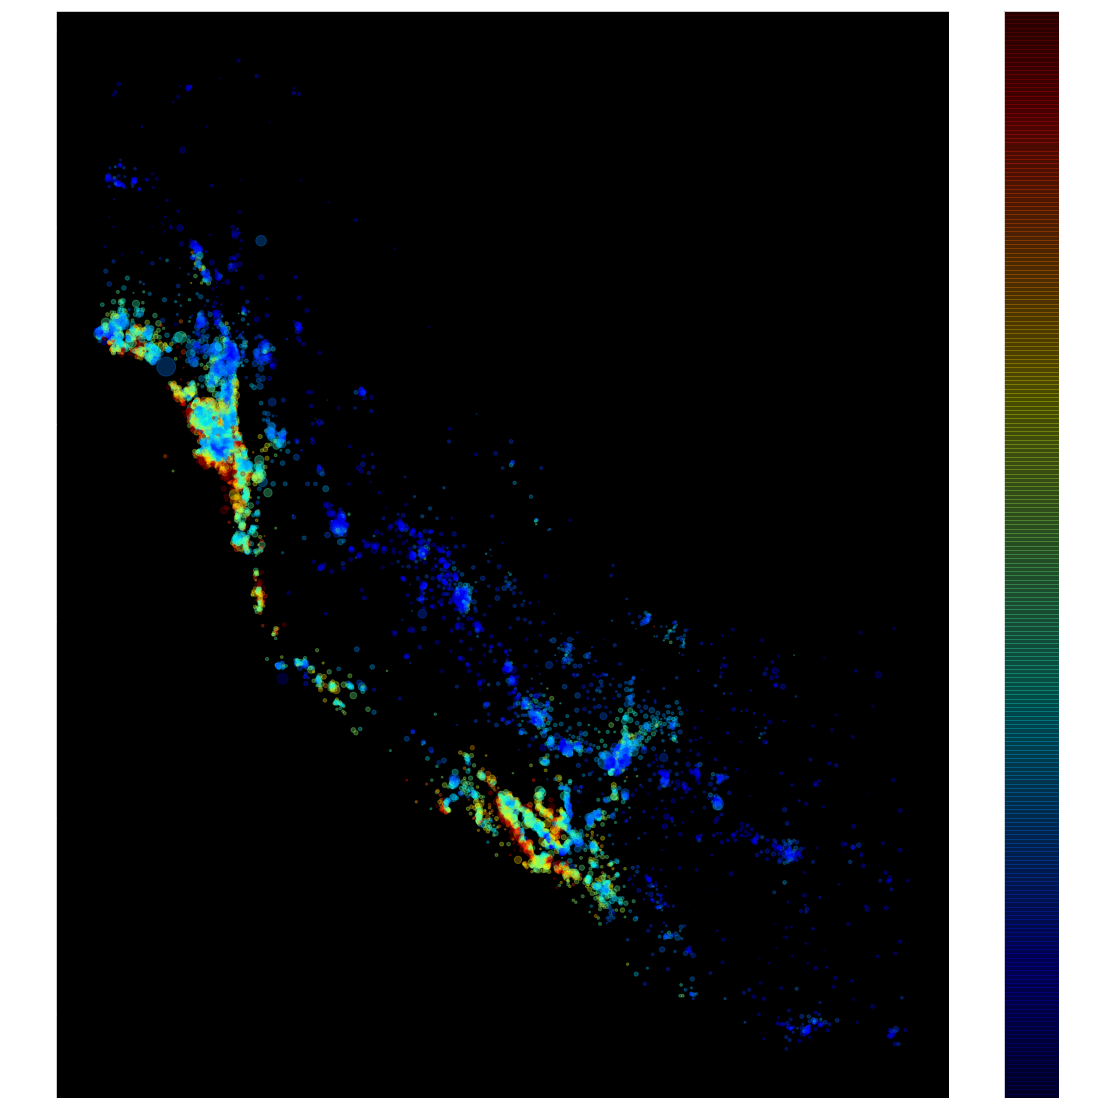

In [12]:
housing.plot(kind = 'scatter', x = 'latitude', y = 'longitude', alpha = 0.3,
             s = housing['population']/100, c = housing['median_house_value'],
            figsize = (20,20), colorbar = True, cmap = plt.get_cmap('jet'))

In [13]:
#Correlation Analysis
corr_matrix = housing.corr()
corr_matrix = corr_matrix.apply(lambda x: round(x,3))
corr_matrix.loc['median_house_value'].sort_values(ascending = False)
#fig, ax = plt.subplots(1,1, figsize = (10,10))
#sbn.heatmap(corr_matrix, cmap = 'hot')


median_house_value    1.000
median_income         0.688
total_rooms           0.136
housing_median_age    0.107
households            0.066
total_bedrooms        0.050
population           -0.025
longitude            -0.048
latitude             -0.143
Name: median_house_value, dtype: float64

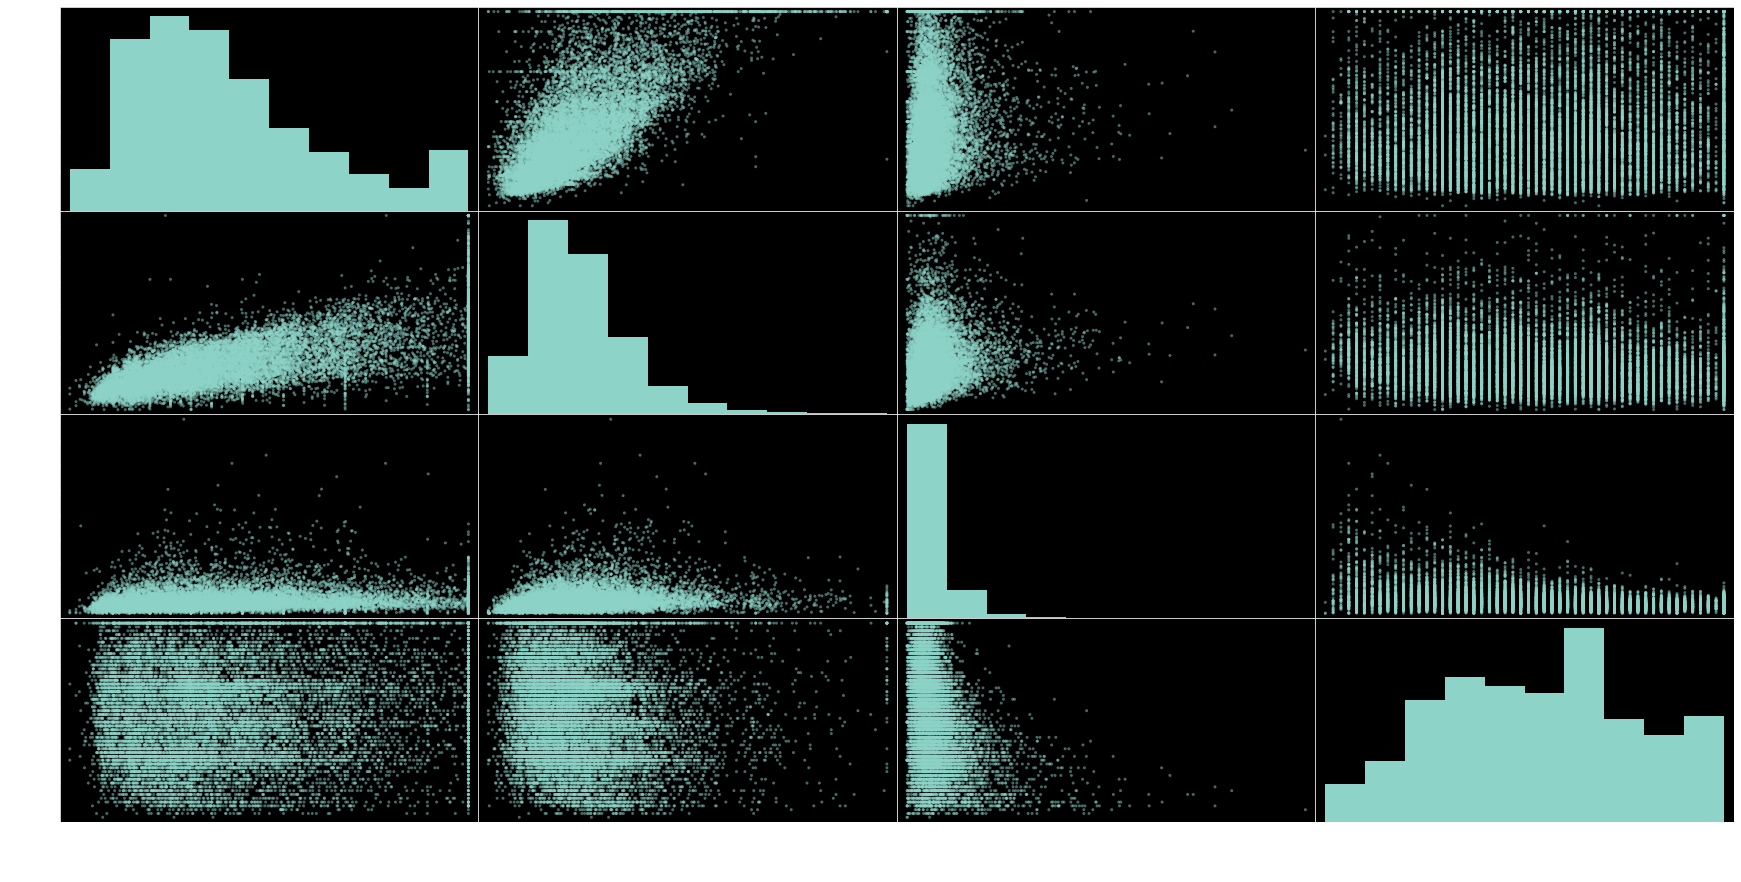

In [14]:
#Scatter matrix
from pandas.plotting import scatter_matrix
attr = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attr], figsize = (30,15))
plt.show()

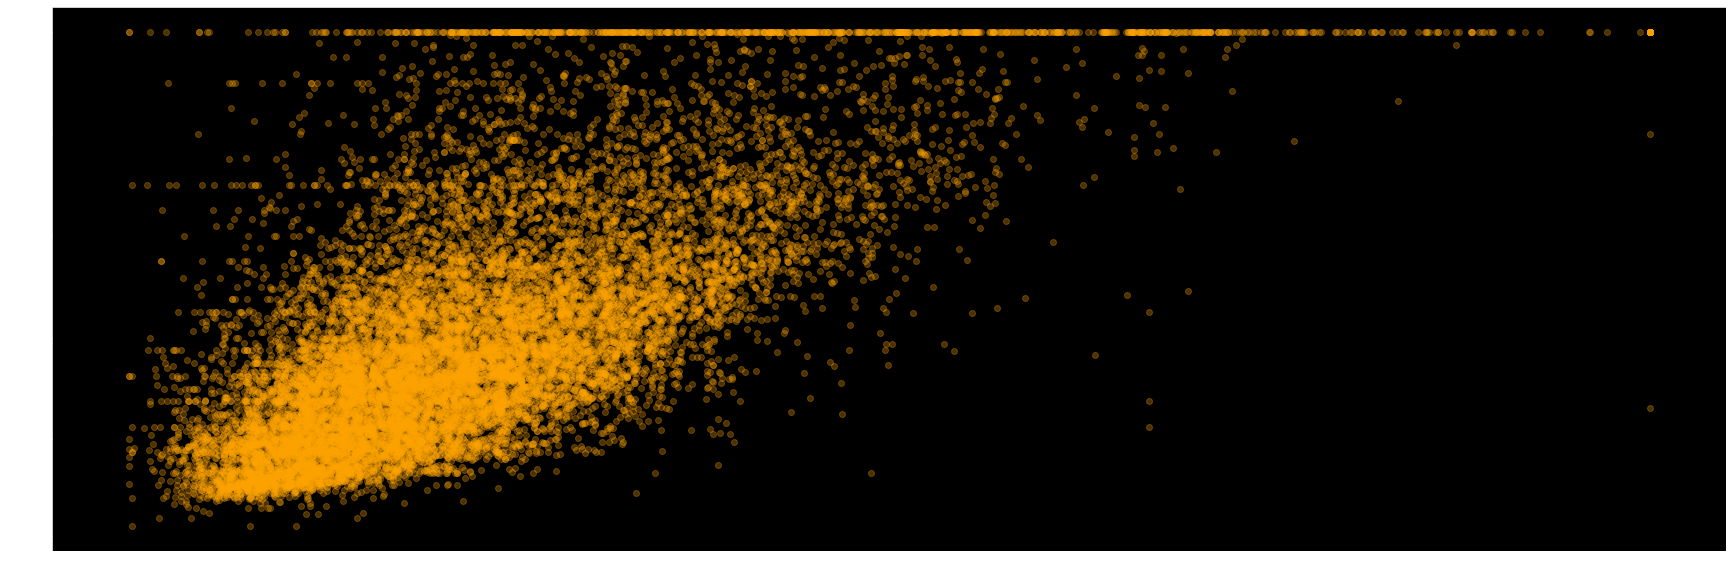

In [15]:
fig = plt.figure(figsize = (30,10))
plt.scatter(y = housing['median_house_value'], x = housing['median_income'], alpha = 0.3, c = 'orange')
plt.show()

In [16]:
housing["rooms_per_household"] = housing['total_rooms']/housing['households']
housing["bedrooms_per_room"] = housing['total_bedrooms']/housing['total_rooms']
housing["population_per_household"] = housing["population"]/housing["households"]

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17172,-122.26,37.38,28.0,1103,164.0,415.0,154,7.8633,500001.0,NEAR OCEAN,7.162338,0.148685,2.694805
5293,-118.43,34.07,38.0,3251,656.0,1251.0,593,7.7382,500001.0,<1H OCEAN,5.482293,0.201784,2.109612
14663,-117.12,32.80,29.0,2863,534.0,1392.0,522,3.8719,174200.0,NEAR OCEAN,5.484674,0.186518,2.666667
13986,-117.06,34.87,14.0,3348,619.0,1756.0,557,3.5987,91400.0,INLAND,6.010772,0.184886,3.152603
16896,-122.36,37.58,37.0,3325,734.0,1468.0,692,4.0987,434000.0,NEAR OCEAN,4.804913,0.220752,2.121387


In [18]:
housing.corr()["median_house_value"]

longitude                  -0.047586
latitude                   -0.142814
housing_median_age          0.106985
total_rooms                 0.136422
total_bedrooms              0.050081
population                 -0.024622
households                  0.066340
median_income               0.687752
median_house_value          1.000000
rooms_per_household         0.145300
bedrooms_per_room          -0.258861
population_per_household   -0.022435
Name: median_house_value, dtype: float64

In [19]:
housing = strat_train_set.drop('median_house_value', axis = 1).sort_index()
housing_label = strat_train_set['median_house_value'].copy()

In [20]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        159
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)

housing_imputed = pd.DataFrame(X, columns = housing_num.columns)
housing_imputed.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [22]:
#Avaliando atributos de texto
from sklearn.preprocessing import OneHotEncoder
housing_cat = housing['ocean_proximity']
housing_encoded, housing_categories = housing_cat.factorize()
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_encoded.reshape(-1,1))
housing_cat_1hot = housing_cat_1hot.toarray()

pd.DataFrame(housing_cat_1hot, columns = housing_categories)

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,0.0,0.0,1.0,0.0,0.0
16508,0.0,0.0,1.0,0.0,0.0
16509,0.0,0.0,1.0,0.0,0.0
16510,0.0,0.0,1.0,0.0,0.0


In [23]:
housing_categories

CategoricalIndex(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], categories=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], ordered=False, dtype='category')

In [24]:
"""
Creating a transformer class:

This transformer class will create the previously created attributes (bedrooms per room, rooms per household, population per household)

Due to the column locations, this class will only work on the housing dataframe, which is the original dataframe minus the label (median_value).

"""
from sklearn.base import BaseEstimator, TransformerMixin

rooms_inx, bedrooms_inx, population_inx, household_inx = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, bpr = True, rph = True, pph = True):
        self.bpr = bpr;
        self.rph = rph;
        self.pph = pph;
        self.bedrooms_per_room = pd.Series()
        self.rooms_per_household = pd.Series()
        self.population_per_household = pd.Series()
    
    def fit(self, x_data, y_data = None):
        return self #Creates the class with x_data as x_data
    
    def transform(self, x_data, y = None):
        bedrooms_per_room = x_data[:, bedrooms_inx] / x_data[:,rooms_inx]
        rooms_per_household = x_data[:, rooms_inx] / x_data[:, household_inx]
        population_per_household = x_data[:, population_inx] / x_data[:, household_inx]
        
    
        if(self.bpr and self.rph and self.pph):
            return np.c_[x_data, bedrooms_per_room, rooms_per_household, population_per_household]
        
        elif(self.bpr and self.rph and not self.pph):
            return np.c_[x_data, bedrooms_per_room, rooms_per_household]
        
        elif(self.bpr and not self.rph and not self.pph):
            return np.c_[x_data, bedrooms_per_room]


In [25]:
attr_creator = CombinedAttributesAdder(bpr = True, rph = True, pph = True)
housing_extra_attr = attr_creator.transform(housing.values)

<ipython-input-24-db51d7664787>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.bedrooms_per_room = pd.Series()
<ipython-input-24-db51d7664787>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.rooms_per_household = pd.Series()
<ipython-input-24-db51d7664787>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.population_per_household = pd.Series()


In [26]:
#Creating Pipelines for data transformation
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

#1st step - Creating a dataFrame Selector

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attr_names):
        self.attr_names = attr_names
    
    def fit(self, x_data, y_data = None):
        return self
    
    def transform(self, x_data, y_data = None):
        return x_data[self.attr_names].values


#2nd Step, creating the numerical pipeline

housing = strat_train_set.drop('median_house_value', axis = 'columns')
housing_label = strat_train_set['median_house_value'].copy()
housing_num = housing.drop('ocean_proximity', axis = 'columns')
housing_cat = housing['ocean_proximity']

num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attr)),
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('attr_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler())
])


cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attr)),
    ('encoder', OneHotEncoder()),
])



<ipython-input-24-db51d7664787>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.bedrooms_per_room = pd.Series()
<ipython-input-24-db51d7664787>:19: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.rooms_per_household = pd.Series()
<ipython-input-24-db51d7664787>:20: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.population_per_household = pd.Series()


In [27]:
#Joinning both pipelines
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipe', num_pipeline),
    ('cat_pipe', cat_pipeline)
])

In [28]:
#Utilizing the final Pipeline
housing_prepared = full_pipeline.fit_transform(housing)

In [29]:
#Modelling
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

some_data = housing
some_label = housing_label

some_data_prepared = full_pipeline.fit_transform(some_data)

print(lin_reg.predict(some_data_prepared)[0:5])
print(list(some_label)[0:5])

[396755.84619112 410207.46934584 229475.61113915  97116.60902013
 289449.27863801]
[500001.0, 500001.0, 174200.0, 91400.0, 434000.0]


In [30]:
#RMSE do modelo
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print(round(lin_rmse), round(lin_mse))

68612 4707556370


In [31]:
print(list(housing_predictions[35:45].round()))
print(list(housing_label[35:45].round()))

[407261.0, 138187.0, 252841.0, 256449.0, 106775.0, 218467.0, 136279.0, 198577.0, 239224.0, 83223.0]
[500001.0, 108200.0, 263800.0, 195600.0, 76300.0, 168100.0, 212500.0, 72500.0, 320700.0, 42100.0]


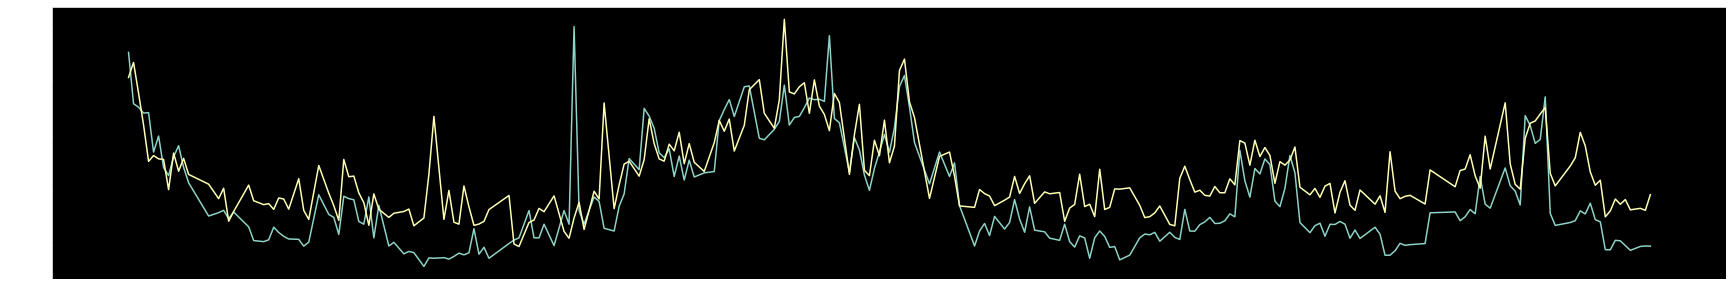

In [32]:
DF = pd.DataFrame(housing_label)
DF['pred'] = housing_predictions
DF.sort_index(inplace = True)

labels = DF.iloc[:,0]
predictions = DF.iloc[:,1]

plt.figure(figsize = (30,5))
plt.plot(labels[:250])
plt.plot(predictions[:250])


In [33]:
#Testando outro modelo (Decision Tree Regression)

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label, )
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = np.sqrt(mean_squared_error(housing_label, housing_predictions))
tree_rmse

0.0

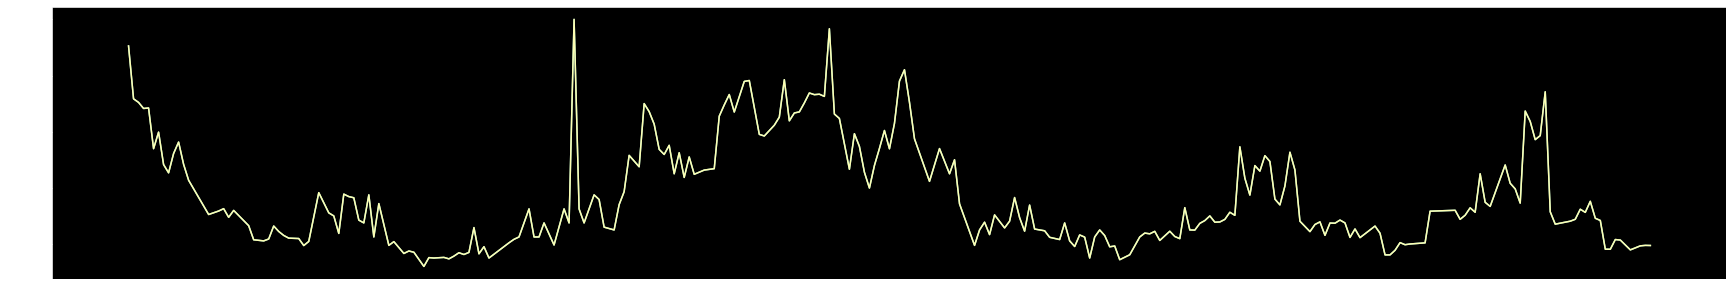

In [34]:
#graficamente - 100% overfitting
DF = pd.DataFrame(housing_label)
DF['pred'] = housing_predictions
DF.sort_index(inplace = True)

labels = DF.iloc[:,0]
predictions = DF.iloc[:,1]

plt.figure(figsize = (30,5))
plt.plot(labels[:250])
plt.plot(predictions[:250])

In [35]:
#Usando cross-validation para a arvore
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_label, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [36]:
tree_rmse_scores.mean()

72086.4508764298

In [37]:
#Usando cross-validation para o modelo linear
scores = cross_val_score(lin_reg, housing_prepared, housing_label, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-scores)

In [38]:
lin_rmse_scores.mean()

68956.74380290667

In [39]:
#Treinando um novo modelo - RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor
rd_reg = RandomForestRegressor(n_estimators = 4)
rd_reg.fit(housing_prepared, housing_label)
scores = cross_val_score(rd_reg, housing_prepared, housing_label, scoring = 'neg_mean_squared_error', cv = 10)
rd_rmse_scores = np.sqrt(-scores)

In [40]:
housing_predictions = rd_reg.predict(housing_prepared)
rd_rmse = np.sqrt(mean_squared_error(housing_label, housing_predictions))
print(rd_rmse) #Sem cross-val, o modelo está com erro muito baixo (overfitting?)
print(rd_rmse_scores.mean())

27244.944904769276
57238.21620695705


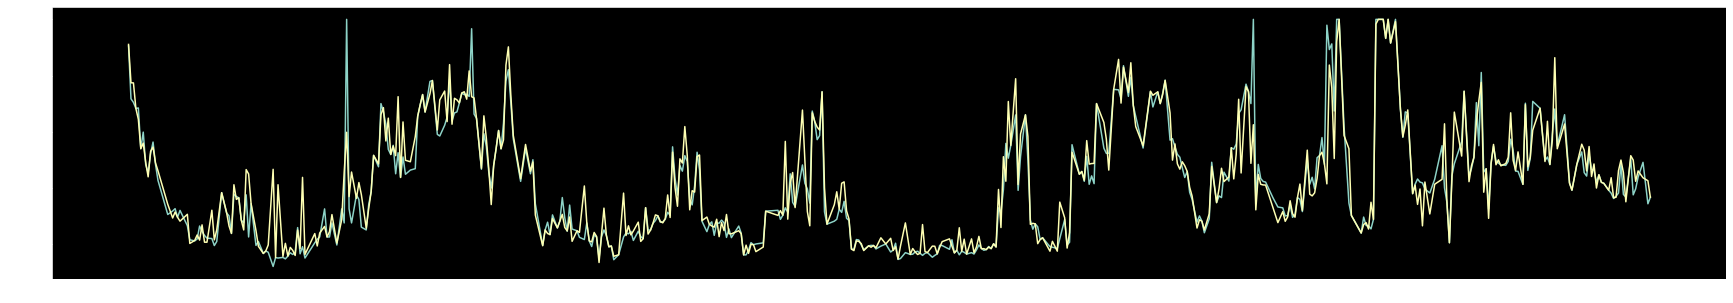

In [41]:
#Visão gráfica
DF = pd.DataFrame(housing_label)
DF['pred'] = housing_predictions
DF.sort_index(inplace = True)

labels = DF.iloc[:,0]
predictions = DF.iloc[:,1]

plt.figure(figsize = (30,5))
plt.plot(labels[:500])
plt.plot(predictions[:500])


In [42]:
#Salvando o modelo
import joblib
joblib.dump(rd_reg, 'random_regressor.pkl')

['random_regressor.pkl']

In [43]:
#Ajuste de modelos com GridSearch

from sklearn.model_selection import GridSearchCV

parameters = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2,4,6,8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, parameters, cv = 5, scoring = 'neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [44]:
#Best parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [45]:
#Checking the results
cvresults = grid_search.cv_results_

for mean_score, params in zip(cvresults['mean_test_score'], cvresults['params']):
    print(round(np.sqrt(-mean_score)), params)

64272 {'max_features': 2, 'n_estimators': 3}
56395 {'max_features': 2, 'n_estimators': 10}
53521 {'max_features': 2, 'n_estimators': 30}
60202 {'max_features': 4, 'n_estimators': 3}
53324 {'max_features': 4, 'n_estimators': 10}
51114 {'max_features': 4, 'n_estimators': 30}
59355 {'max_features': 6, 'n_estimators': 3}
52700 {'max_features': 6, 'n_estimators': 10}
50276 {'max_features': 6, 'n_estimators': 30}
59555 {'max_features': 8, 'n_estimators': 3}
52738 {'max_features': 8, 'n_estimators': 10}
50579 {'max_features': 8, 'n_estimators': 30}
63036 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54738 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60814 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53168 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58942 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
52302 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [46]:
#Checando a importância dos atributos

feature_imp = grid_search.best_estimator_.feature_importances_
feature_imp

array([6.90993225e-02, 6.95979243e-02, 4.33496255e-02, 1.69058826e-02,
       1.76452882e-02, 1.71797132e-02, 1.71793827e-02, 3.54029779e-01,
       6.20476488e-02, 6.11192392e-02, 1.07978534e-01, 8.78258741e-03,
       1.47799459e-01, 5.27952450e-05, 2.85043989e-03, 4.38237866e-03])

In [54]:
extra_attribs = ['bedrooms_per_room', 'rooms_per_household', 'population_per_household']
cat_attribs = cat_pipeline.named_steps['encoder']
cat_one_hot_attribs = list(cat_attribs.categories_[0])
num_attribs = list(housing_num)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs #Same order as the original project (num_pipeline adds the extra attr, then cat_encoder adds the one_hot version of 'ocean_proximity')
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_room',
 'rooms_per_household',
 'population_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [57]:
#Showing the features by order of importance
sorted(zip(feature_imp.round(3), attributes), reverse = True)
#From here onward, we could discard the less important features on the model and try to run it a few more times. As this is not the objective of this 'exercise', this will not be done right now.

[(0.354, 'median_income'),
 (0.148, 'INLAND'),
 (0.108, 'population_per_household'),
 (0.07, 'latitude'),
 (0.069, 'longitude'),
 (0.062, 'bedrooms_per_room'),
 (0.061, 'rooms_per_household'),
 (0.043, 'housing_median_age'),
 (0.018, 'total_bedrooms'),
 (0.017, 'total_rooms'),
 (0.017, 'population'),
 (0.017, 'households'),
 (0.009, '<1H OCEAN'),
 (0.004, 'NEAR OCEAN'),
 (0.003, 'NEAR BAY'),
 (0.0, 'ISLAND')]

In [69]:
#Evaluating the model on the test set
final_model = grid_search.best_estimator_

x_test_data = strat_test_set.drop('median_house_value', axis = 'columns').copy().sort_index()
y_test_label = strat_test_set['median_house_value'].copy().sort_index()
x_prepared = full_pipeline.fit_transform(x_test_data)

final_predictions = final_model.predict(x_prepared)

In [92]:
#Scored RMSE
final_scores = cross_val_score(final_model, x_prepared, y_test_label, scoring = 'neg_mean_squared_error', cv = 5)
np.sqrt(-final_scores.round(2).mean())

33.43818433719418

In [77]:
#Regular RMSE
final_score_manual = mean_squared_error(y_test_label, final_predictions)
np.sqrt(final_score_manual)

59806.507705712596

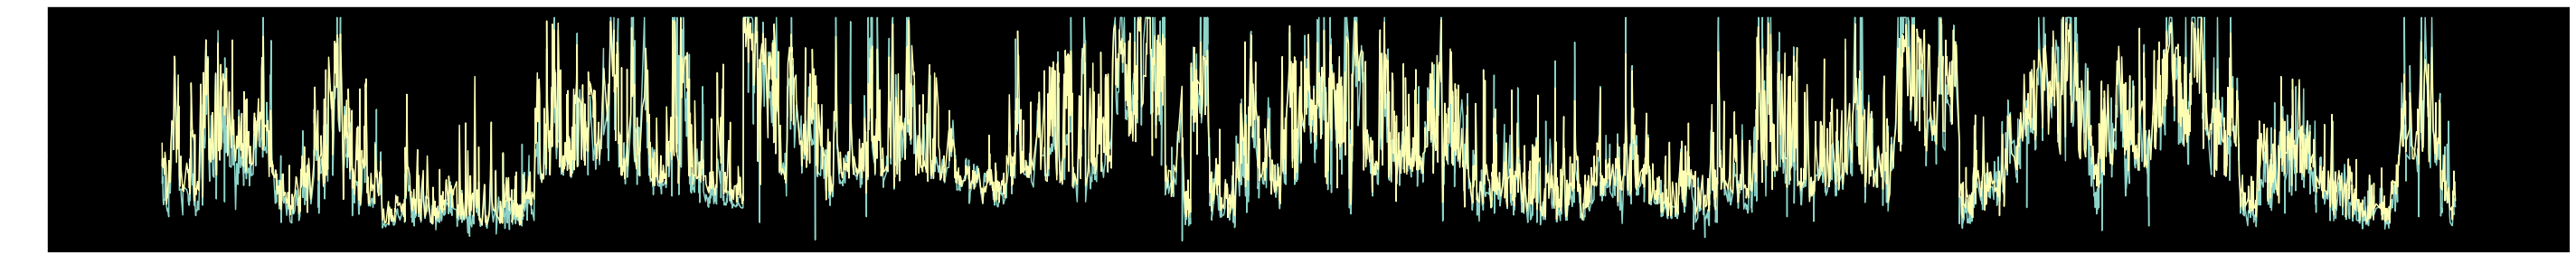

In [90]:
#Visualizing the results

real_data = y_test_label
predicted_data = final_predictions

DF = pd.DataFrame({'real_data':real_data, 'predicted' :predicted_data})
plt.figure(figsize = (50,5))
plt.plot(DF.iloc[:, 0])
plt.plot(DF.iloc[:, 1])

In [ ]:
#Conclusion
'''The model is, obviusly, not a good fit. The point of this exercise was to work on a ML project from beggning to end. To see results that aim for a good model, please refer to the other projects on the repository'''